# **Week 2: Classifier**

### **TAs: Chiku Parida (chipa@dtu.dk), Dr. Dipendu Roy (dipro@dtu.dk)**

## **Objectives:**
- Understand the concept of classification.
- Implement a simple classification model using Python.
- Evaluate the performance of the classification model.

Dataset: The dataset is a CSV file containing heat treatment of steels.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data_classification.csv')
print(df.head())
print(df.info())

    Std                                ID        Material Heat treatment   Su  \
0  ANSI  D8894772B88F495093C43AF905AB6373  Steel SAE 1015      as-rolled  421   
1  ANSI  05982AC66F064F9EBC709E7A4164613A  Steel SAE 1015     normalized  424   
2  ANSI  356D6E63FF9A49A3AB23BF66BAC85DC3  Steel SAE 1015       annealed  386   
3  ANSI  1C758F8714AC4E0D9BD8D8AE1625AECD  Steel SAE 1020      as-rolled  448   
4  ANSI  DCE10036FC1946FC8C9108D598D116AD  Steel SAE 1020     normalized  441   

    Sy    A5    Bhn       E      G   mu    Ro     pH Desc  HV  
0  314  39.0  126.0  207000  79000  0.3  7860    NaN  NaN NaN  
1  324  37.0  121.0  207000  79000  0.3  7860    NaN  NaN NaN  
2  284  37.0  111.0  207000  79000  0.3  7860    NaN  NaN NaN  
3  331  36.0  143.0  207000  79000  0.3  7860    NaN  NaN NaN  
4  346  35.8  131.0  207000  79000  0.3  7860  550.0  NaN NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 15 columns):
 #   Column          N

### Preparing and cleaning data

In [5]:
# Merge the first three columns using string concatenation
df['Material'] = df[['Std', 'Material', 'Heat treatment']].fillna('').agg(' '.join, axis=1)

In [6]:
# Remove any string values from Sy column
df['Sy'] = df['Sy'].str.replace(' max', '').astype(int)

In [7]:
# Drop the unnecessary columns
df.drop(['Std','ID', 'Heat treatment','A5','Bhn','pH','Desc','HV'], axis=1, inplace=True)
df.head(4)

,Material,Su,Sy,E,G,mu,Ro
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.3,7860
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.3,7860
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.3,7860
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.3,7860


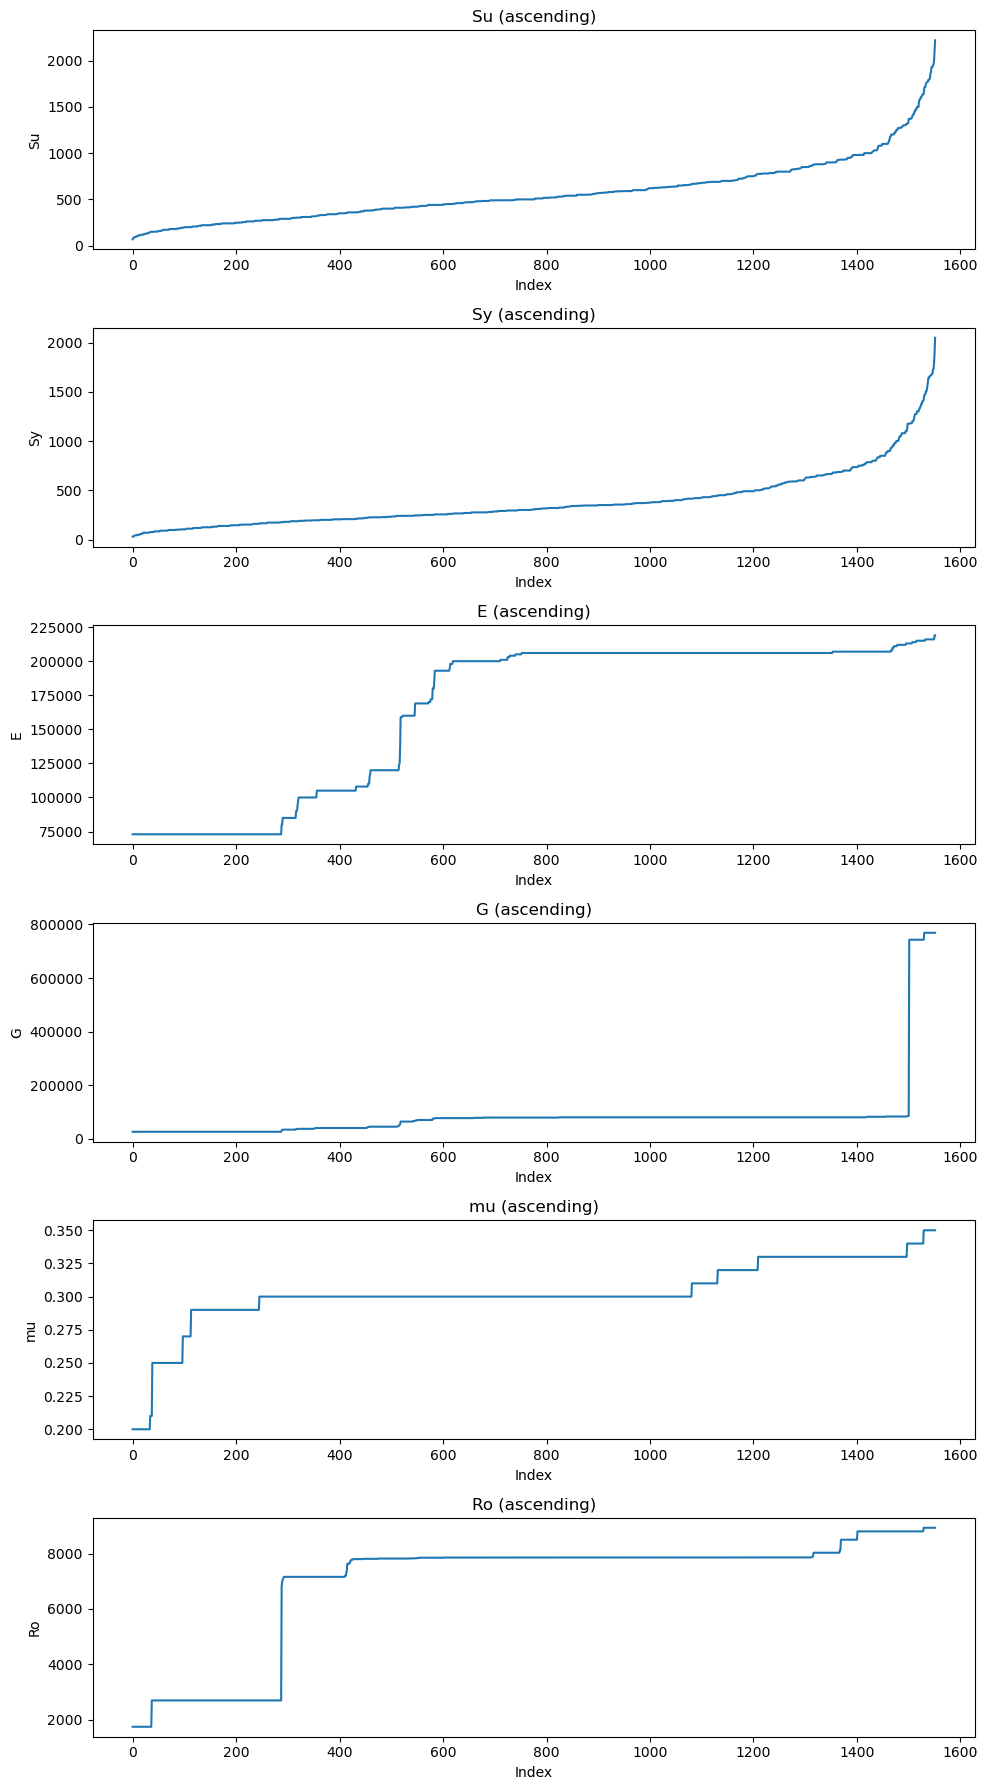

In [8]:
import matplotlib.pyplot as plt

# Select columns to plot
columns_to_plot = ['Su', 'Sy', 'E', 'G', 'mu', 'Ro']

# Sort each column and plot
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 18))
for i, col in enumerate(columns_to_plot):
    sorted_values = df[col].sort_values(ascending=True).reset_index(drop=True)
    axs[i].plot(sorted_values)
    axs[i].set_title(f'{col} (ascending)')
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('Index')

plt.tight_layout()
plt.show()

## Lets Create a multi-class target

In [10]:
# Define the rating function
def get_rating(row):
    if (438.3 <= row['Su'] <= 535.7 and
        318.6 <= row['Sy'] <= 389.4 and
        204930 <= row['E'] <= 209070 and
        71100 <= row['G'] <= 86900 and
        0.285 <= row['mu'] <= 0.315 and
            7467 <= row['Ro'] <= 8253):
        return 5
    elif (389.6 <= row['Su'] <= 584.4 and
          283.2 <= row['Sy'] <= 424.8 and
          202860 <= row['E'] <= 211140 and
          63200 <= row['G'] <= 94800 and
          0.27 <= row['mu'] <= 0.33 and
          7074 <= row['Ro'] <= 8646):
        return 4
    elif (340.9 <= row['Su'] <= 633.1 and
          247.8 <= row['Sy'] <= 460.2 and
          200790 <= row['E'] <= 213210 and
          55300 <= row['G'] <= 102700 and
          0.255 <= row['mu'] <= 0.345 and
          6681 <= row['Ro'] <= 9039):
        return 3
    elif (292.2 <= row['Su'] <= 681.8 and
          212.4 <= row['Sy'] <= 495.6 and
          198720 <= row['E'] <= 215280 and
          47400 <= row['G'] <= 110600 and
          0.24 <= row['mu'] <= 0.36 and
          6288 <= row['Ro'] <= 9432):
        return 2
    else:
        return 1


In [11]:
# Calculate the rating for each row
df['rating'] = df.apply(get_rating, axis=1)
df.head(4)

,Material,Su,Sy,E,G,mu,Ro,rating
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.3,7860,4
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.3,7860,4
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.3,7860,3
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.3,7860,5


In [12]:
# # Save the results to a new file data.csv
# df.to_csv('data.csv', index=False)

# Separate the features and label columns
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [15]:
# Train a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
# Predict the rating of a new material
new_material = np.array([560, 389, 207000, 79000, 0.35, 7860]).reshape(1, -1)
new_rating = clf.predict(new_material)
print("Predicted rating of the new material:", new_rating)

Predicted rating of the new material: [4]


## Questions:

- **What are hyperparameters in RandomForestClassifier, and which ones are most important to tune?**

- **How does changing `n_estimators` affect model accuracy and overfitting?**

- **What is the impact of `max_depth` on bias and variance in the classifier?**

- **How can you use cross-validation to evaluate the performance of different hyperparameter settings?**

- **Which metrics (e.g., accuracy, precision, recall, F1-score) are most appropriate for evaluating this classification problem?**

- **How do you interpret the feature importances provided by the trained RandomForestClassifier?**

- **What strategies can be used to prevent overfitting when tuning hyperparameters?**

- **How does the choice of `max_features` influence the diversity and performance of the trees in the forest?**

- **How do you analyze the confusion matrix and classification report to identify model weaknesses?**

## Now its time try some other regressors we studied during the morning session.

1. [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
2. [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
3. [Extreme Gradient Boosting Classifier](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
4. [AdaBoost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)